http://forums.fast.ai/t/keras-2-released/1956/42

## Overview of homework assignment

1. Get AWS instance running (either g2 or m4 if not yet approved for g2) after contacting support etc.
2. Setup ssh keys as per instructions in setup video
3. install bash setup script onto server instance
4. launch jupyter notebook on the instance
5. once the notebook is running, review the lesson 1 notebook notes and run each cell of code to figure out what python and vgg is doing
6. install kaggle CLI onto the server instance

7. use the kaggle CLI to download the current data for the Dogs vs. Cats Redux competition

8. configure the new data to the file structure in the same way that was used in the sample lesson 1 notebook

9. make a copy of the lesson 1 notebook and use the new copy to draw in the new Dogs Vs. Cats data (if you copy the notebook outside of the course folder, don't forget the utils.py, vgg16.py files etc)

10. Run the relevant code cells on the sample set of new Dogs v. Cats data to make a prediction on the new image data set.

In [1]:
%matplotlib inline

path = "data/dogscats/sample/"
batch_size = 64

from __future__ import division, print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)

from matplotlib import pyplot as plt

from importlib import reload

import utils; reload(utils)
from utils import plots

import vgg16; reload(vgg16)
from vgg16 import Vgg16

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
Using TensorFlow backend.


Found 16 images belonging to 2 classes.


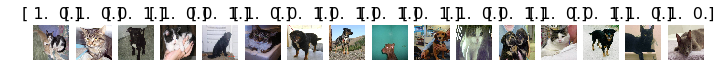

In [2]:
vgg = Vgg16();
batches = vgg.get_batches(path + 'train', batch_size = batch_size)
#val_batches = vgg.get_batches(path + 'valid', batch_size = batch_size)

#batches.nb_class = batches.num_class
#batches.nb_sample = batches.samples
#val_batches.nb_class = val_batches.num_class
#val_batches.nb_sample = val_batches.samples

imgs, labels = next(batches)
plots(imgs, titles=labels)

In [3]:
vgg.predict(imgs, True)

(array([ 0.1573,  0.5232,  0.1786,  0.3318,  0.4155,  0.6288,  0.1952,  0.1351,  0.1499,  0.3322,
         0.2375,  0.2458,  0.142 ,  0.085 ,  0.08  ,  0.6252], dtype=float32),
 array([362, 281, 195, 377, 199, 283, 214, 217, 736, 151, 355, 158, 728, 191, 285, 178], dtype=int64),
 ['badger',
  'tabby',
  'Boston_bull',
  'marmoset',
  'Scotch_terrier',
  'Persian_cat',
  'Gordon_setter',
  'English_springer',
  'pool_table',
  'Chihuahua',
  'llama',
  'toy_terrier',
  'plastic_bag',
  'Airedale',
  'Egyptian_cat',
  'Weimaraner'])

11. Once the sample set works, modify the jupyter notebook to use the new test data images

In [6]:
%pwd

'C:\\Users\\hjkim\\AnacondaProjects\\fastai\\courses\\deeplearning1\\nbs'

In [7]:
import os, sys
current_dir = os.getcwd()
LESSON_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir + '/data/redux'

In [8]:
%matplotlib inline

## Action plan
1. Create Validation and Sample Sets
2. Rearrange image files into their respective directories
3. Finetune and Train model
4. Generate predictions
5. Validate predictions
6. Submit predicions to Kaggle

## Craete validation set and sample

In [19]:
# Create directories
%cd $DATA_HOME_DIR
%mkdir valid
%mkdir results
%mkdir sample\train
%cd $DATA_HOME_DIR
%mkdir sample\test
%cd $DATA_HOME_DIR
%mkdir sample\valid
%cd $DATA_HOME_DIR
%mkdir sample\results
%cd $DATA_HOME_DIR
%mkdir test\unknown
%cd $DATA_HOME_DIR

C:\Users\hjkim\AnacondaProjects\fastai\courses\deeplearning1\nbs\data\redux


A subdirectory or file valid already exists.
A subdirectory or file results already exists.


C:\Users\hjkim\AnacondaProjects\fastai\courses\deeplearning1\nbs\data\redux
C:\Users\hjkim\AnacondaProjects\fastai\courses\deeplearning1\nbs\data\redux
C:\Users\hjkim\AnacondaProjects\fastai\courses\deeplearning1\nbs\data\redux
C:\Users\hjkim\AnacondaProjects\fastai\courses\deeplearning1\nbs\data\redux
C:\Users\hjkim\AnacondaProjects\fastai\courses\deeplearning1\nbs\data\redux


A subdirectory or file test\unknown already exists.


In [21]:
%cd $DATA_HOME_DIR/train
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(2000):
    os.rename(shuf[i], DATA_HOME_DIR + '/valid/' + shuf[i])

from shutil import copyfile
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(200):
    copyfile(shuf[i], DATA_HOME_DIR + '/sample/train/' + shuf[i])
    
%cd $DATA_HOME_DIR/valid
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(50):
    copyfile(shuf[i], DATA_HOME_DIR + '/sample/valid/' + shuf[i])

C:\Users\hjkim\AnacondaProjects\fastai\courses\deeplearning1\nbs\data\redux\train
C:\Users\hjkim\AnacondaProjects\fastai\courses\deeplearning1\nbs\data\redux\valid


## Rearrange image files into their respective directories

In [25]:
# Divide cat/dog images into seperate directories
%cd $DATA_HOME_DIR/sample/train
%mkdir cats
%mkdir dogs
%ren cats.*.jpg cats\
%ren dogs.*.jpg dogs\

%cd $DATA_HOME_DIR/sample/valid
%mkdir cats
%mkdir dogs
%ren cats.*.jpg cats\
%ren dogs.*.jpg dogs\

%cd $DATA_HOME_DIR/valid
%mkdir cats
%mkdir dogs
%ren cats.*.jpg cats\
%ren dogs.*.jpg dogs\

%cd $DATA_HOME_DIR/train
%mkdir cats
%mkdir dogs
%ren cats.*.jpg cats\
%ren dogs.*.jpg dogs\

C:\Users\hjkim\AnacondaProjects\fastai\courses\deeplearning1\nbs\data\redux\sample\train


A subdirectory or file cats already exists.
A subdirectory or file dogs already exists.


C:\Users\hjkim\AnacondaProjects\fastai\courses\deeplearning1\nbs\data\redux\sample\valid


The syntax of the command is incorrect.
A subdirectory or file cats already exists.
A subdirectory or file dogs already exists.


C:\Users\hjkim\AnacondaProjects\fastai\courses\deeplearning1\nbs\data\redux\valid


The syntax of the command is incorrect.


C:\Users\hjkim\AnacondaProjects\fastai\courses\deeplearning1\nbs\data\redux\train


The syntax of the command is incorrect.
The syntax of the command is incorrect.


In [ ]:
# Create single 'unknown' class for test set
%cd %DATA_HOME_DIR/test
%mv *.jpg unknown/

In [4]:
path = 'data/dogscats/'
#batch_size = 64
batch_size = 8

12. write a script that takes the predict() data of the new Dogs vs. Cats data and writes the data to a new csv file in the format of the sample_submission.csv file that was downloaded with the Dogs vs. Cats

In [5]:
batches = vgg.get_batches(path + 'test1', batch_size = batch_size)
imgs, labels = next(batches)
plots(imgs, titles = labels)
vgg.predict(imgs, True)

Found 0 images belonging to 0 classes.


ZeroDivisionError: integer division or modulo by zero

13. submit that new submission.csv file to the kaggle via the CLI tool

14. check the public scoreboard for your own ranking

15. modify or tune current code in the lesson 1 notebook to try to get into the top 50% ranking of the current Dogs v Cats competition

16. start exploring the other new datasets on kaggle and decide which one you or some teammates would like to study further during the course

17. download the new data to your EC2 instance and repeat the previous steps with your brand new data.